<a href="https://colab.research.google.com/github/minotajordan/metaheuristic/blob/main/Hill_climbing_random_restarst_nD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to be minimized ( sphere function)
def sphere(pos):
  return (pos * pos).sum()

def step(pos):
  new_pos = np.floor(pos + 0.5)
  return (new_pos * new_pos).sum()

In [ ]:
# Define the hill climbing with random restarts descent algorithm
def hcrr( start_pos, learning_rate, num_restarts, num_iterations, funtion):

  # Initialize the parameters
  d = len (start_pos)
  pos = start_pos
  fpos = funtion(pos)
  posbest = np.copy(pos)
  fbest = fpos
  history = []
  history.append((pos, fpos))

  for reinicios in range (num_restarts):
    # Perform the hill climbig iterations
    for i in range(num_iterations):
      # Update the parameters
      rnd = np.random.uniform(low=-learning_rate, high=learning_rate, size=(d,))
      pos2 = pos + rnd
      fpos2 = funtion(pos2)

      if fpos2 < fpos:
        pos = pos2
        fpos = fpos2
      if fpos2 < fbest:
        posbest = np.copy(pos)
        fbest = fpos2

      # Save the history of the parameters
      history.append((posbest, fbest))

    pos = np.random.uniform(low=-10, high=10, size=(d,))
    fpos = funtion(pos)

  return posbest, fbest, history

In [ ]:
# Perform HCRR
d=10
learning_rate = 0.2
num_iterations = 20
num_restarts = 5

np.random.seed (5)
start_pos = np.random.uniform(low=-10, high=10, size=(d,))
best_pos, f_best, history = hcrr(start_pos, learning_rate, num_restarts, num_iterations, step)

# List the history points
for point in history:
  print(point)

print (f_best)

(array([-5.56013658,  7.41464612, -5.86561689,  8.37221816, -0.23177622,
        2.23487726,  5.31815713,  0.36835976, -4.06398997, -6.24557543]), 266.0)
(array([-5.56013658,  7.41464612, -5.86561689,  8.37221816, -0.23177622,
        2.23487726,  5.31815713,  0.36835976, -4.06398997, -6.24557543]), 266.0)
(array([-5.56013658,  7.41464612, -5.86561689,  8.37221816, -0.23177622,
        2.23487726,  5.31815713,  0.36835976, -4.06398997, -6.24557543]), 266.0)
(array([-5.56013658,  7.41464612, -5.86561689,  8.37221816, -0.23177622,
        2.23487726,  5.31815713,  0.36835976, -4.06398997, -6.24557543]), 266.0)
(array([-5.56013658,  7.41464612, -5.86561689,  8.37221816, -0.23177622,
        2.23487726,  5.31815713,  0.36835976, -4.06398997, -6.24557543]), 266.0)
(array([-5.56013658,  7.41464612, -5.86561689,  8.37221816, -0.23177622,
        2.23487726,  5.31815713,  0.36835976, -4.06398997, -6.24557543]), 266.0)
(array([-5.56013658,  7.41464612, -5.86561689,  8.37221816, -0.23177622,
   

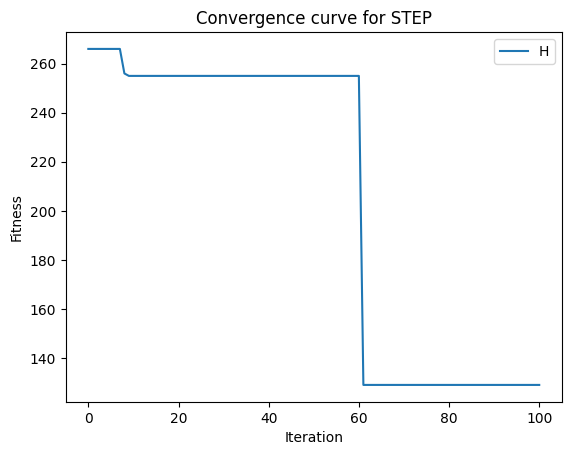

In [ ]:
# Plot convergence curve
iterations = np.arange(len(history))
fitness = []
for i in range(len(history)):
  fitness.append(history[i][1])
plt.title("Convergence curve for STEP")
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.plot(iterations, fitness)
plt.legend("HCRR")
plt.show()